Téléchargement terminé.


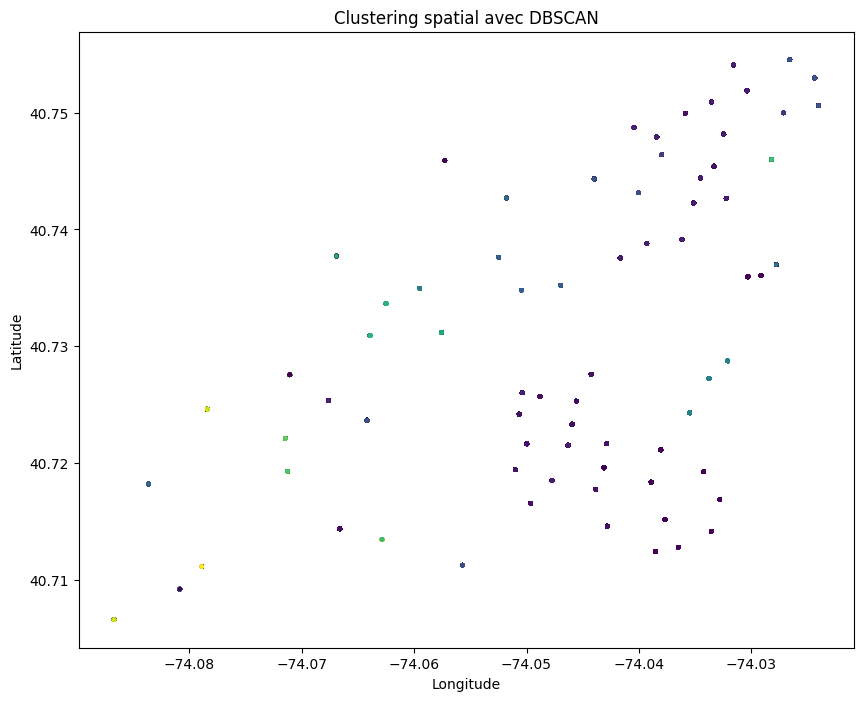

.....1%
.....10%
.....20%


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


.....30%


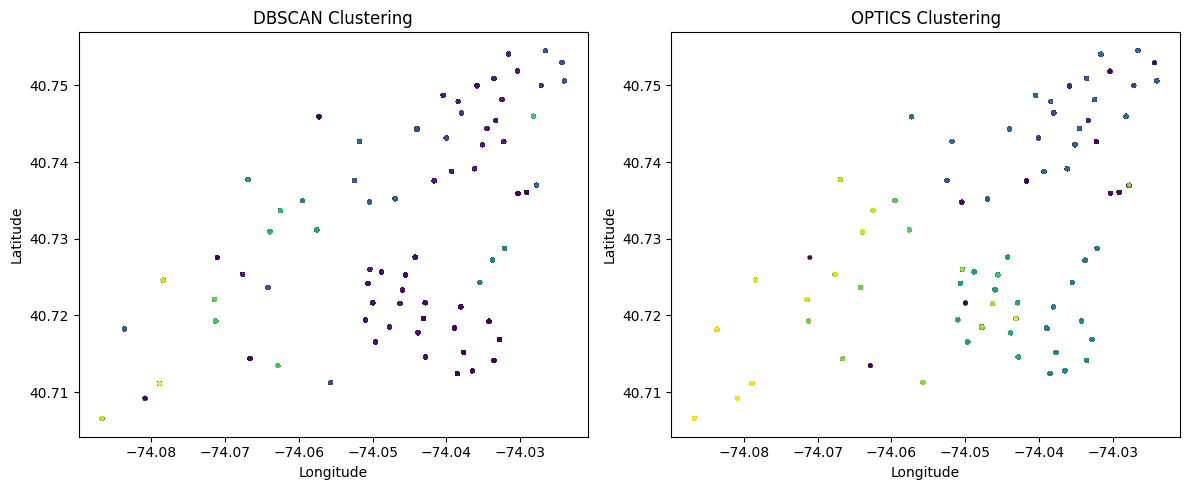

In [2]:
#telecharger dataset
import requests

url = "https://s3.amazonaws.com/tripdata/JC-202109-citibike-tripdata.csv.zip"
file_name = "JC-202109-citibike-tripdata.csv.zip"

response = requests.get(url)
response.raise_for_status()

with open(file_name, "wb") as file:
    file.write(response.content)

print("Téléchargement terminé.")

#regrouper et visualisez les donne a lside de methode de clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import zipfile

# Chemin du fichier ZIP
zip_file_path = "JC-202109-citibike-tripdata.csv.zip"

# Nom du fichier CSV à extraire
csv_file_name = "JC-202109-citibike-tripdata.csv"

# Extraction du fichier CSV à partir du fichier ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_file_name)

# Chargement des données depuis le fichier CSV extrait
data = pd.read_csv(csv_file_name)

# Sélection des colonnes pertinentes pour le clustering spatial
selected_columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng']

# Suppression des lignes contenant des valeurs manquantes dans les colonnes sélectionnées
data = data.dropna(subset=selected_columns)

# Sélection des données pour le clustering spatial
X = data[selected_columns].values

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'algorithme DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# Création d'une figure pour la visualisation des clusters
plt.figure(figsize=(10, 8))

# Affichage des points de données colorés selon leur cluster
plt.scatter(X[:, 1], X[:, 0], c=clusters, cmap="viridis", s=5)

# Configuration des axes et de l'étiquette du titre
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustering spatial avec DBSCAN")

# Affichage de la figure
plt.show()

#comparer result avec d'autre modele base sur la densite

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, MeanShift, OPTICS
from sklearn.preprocessing import StandardScaler
import zipfile

# Chemin du fichier ZIP
zip_file_path = "JC-202109-citibike-tripdata.csv.zip"

# Nom du fichier CSV à extraire
csv_file_name = "JC-202109-citibike-tripdata.csv"

# Extraction du fichier CSV à partir du fichier ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_file_name)

# Chargement des données depuis le fichier CSV extrait
data = pd.read_csv(csv_file_name)

# Sélection des colonnes pertinentes pour le clustering spatial
selected_columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng']

# Suppression des lignes contenant des valeurs manquantes dans les colonnes sélectionnées
data = data.dropna(subset=selected_columns)

# Sélection des données pour le clustering spatial
X = data[selected_columns].values

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(".....1%")

# Application de DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)
print(".....10%")
# Application de MeanShift
#meanshift = MeanShift()
#meanshift_clusters = meanshift.fit_predict(X_scaled)
print(".....20%")
# Application de OPTICS
optics = OPTICS()
optics_clusters = optics.fit_predict(X_scaled)
print(".....30%")
# Création des figures pour la visualisation des clusters
fig, axs = plt.subplots(1, 2, figsize=(12, 5))


# Visualisation des clusters DBSCAN
axs[0].scatter(X[:, 1], X[:, 0], c=dbscan_clusters, cmap='viridis', s=5)
axs[0].set_title('DBSCAN Clustering')

# Visualisation des clusters MeanShift
#axs[2].scatter(X[:, 1], X[:, 0], c=meanshift_clusters, cmap='viridis', s=5)
#axs[2].set_title('MeanShift Clustering')

# Visualisation des clusters OPTICS
axs[1].scatter(X[:, 1], X[:, 0], c=optics_clusters, cmap='viridis', s=5)
axs[1].set_title('OPTICS Clustering')

# Configuration des axes et des étiquettes des titres
for ax in axs:
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Affichage des figures
plt.tight_layout()
plt.show()